In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
models = ["Llama3.1", "Asclepius"]

In [ ]:
manual_evaluation = pd.read_csv('Manual Evaluation - Sheet1.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
manual_evaluation

,Column 1,AnswerID,CorrectedQuestions,Reference Answer,URL,llama3.1 Answer,llama3.1 Hallucination Score,llama3.1 Factor Score,Asclepius Answer,Asclepius Hallucination Score,...,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15
0,0,ADAM_0003147_Sec1.txt,What is (are) Polycystic ovary syndrome ? (Als...,Polycystic ovary syndrome is a condition in wh...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Polycystic ovary syndrome (PCOS) is a common h...,0,3/3,Polycystic ovary syndrome is a condition chara...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ADAM_0003147_Sec2.txt,What causes Polycystic ovary syndrome ? (Also ...,PCOS is linked to changes in hormone levels th...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Polycystic ovary syndrome (PCOS) is a conditio...,0,4/8,The exact cause of Polycystic ovary syndrome i...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ADAM_0002818_Sec7.txt,"What are the medical, developmental, and socia...",Buildup of fluid in tissues of body (lymphedem...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Noonan syndrome is a genetic disorder that aff...,1,1/4,Noonan syndrome is associated with several med...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ADAM_0002818_Sec9.txt,How to prevent Noonan syndrome ?,Couples with a family history of Noonan syndro...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Noonan syndrome is a genetic disorder that aff...,0,1/1,There is currently no known cure or preventive...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,GARD_0004375_Sec1.txt,What are the detailed signs and symptoms of Ne...,The Human Phenotype Ontology provides the foll...,https://rarediseases.info.nih.gov/diseases/372...,Neurofibromatosis-Noonan syndrome is a rare ge...,0,3/8,Neurofibromatosis-Noonan syndrome is character...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,ADAM_0001283_Sec7.txt,Do I need to see a doctor for drug abuse first...,Seek medical attention immediately if you susp...,https://www.nlm.nih.gov/medlineplus/ency/artic...,It is not specified whether you need to see a ...,1,0/1,Seek immediate medical attention if drug overd...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,137,ADAM_0001284_Sec1.txt,What are drug allergies?,Drug allergies are allergic reactions to medic...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Drug allergies refer to an allergic reaction c...,0,2/2,"Drug allergies cause hives, rash, and breathin...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,138,ADAM_0001284_Sec8.txt,What are drug allergies?,Drug allergies are allergic reactions to medic...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Drug allergies refer to an allergic reaction c...,0,2/2,"Drug allergies cause hives, rash, and breathin...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,139,ADAM_0002089_Sec1.txt,What is hyperthermia for treating cancer?,Hyperthermia uses heat to kill cancer cells an...,https://www.nlm.nih.gov/medlineplus/ency/patie...,Hyperthermia is a treatment for cancer that in...,0,3/3,"Hyperthermia heats cancer cells to kill them, ...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
manual_evaluation["llama3.1 Factor Score"] = manual_evaluation["llama3.1 Factor Score"].apply(lambda x: eval(str(x)))
manual_evaluation["Asclepius Factor Score"] = manual_evaluation["Asclepius Factor Score"].apply(lambda x: eval(str(x)))

In [ ]:
manual_evaluation["llama3.1 Hallucination Score"] = manual_evaluation["llama3.1 Hallucination Score"].apply(lambda x: 1 if x == 0 else (0 if x==1 else np.nan))
manual_evaluation["Asclepius Hallucination Score"] = manual_evaluation["Asclepius Hallucination Score"].apply(lambda x: 1 if x == 0 else(0 if x==1 else np.nan))

In [ ]:
from google.colab import files
deep_eval = files.upload()

Saving full.csv to full (1).csv


In [ ]:
deep_eval = pd.read_csv('full.csv')

In [ ]:
deep_eval

,Unnamed: 0,AnswerID,CorrectedQuestions,Reference Answer,URL,llama3.1 Answer,llama3.1 Hallucination Score,llama3.1 Factor Score,Asclepius Answer,Asclepius Hallucination Score,Asclepius Factor Score,DeepEval_llama3.1_score,DeepEval_llama3.1_reason,DeepEval_Asclepius_score,DeepEval_Asclepius_reason
0,0.0,ADAM_0003147_Sec1.txt,What is (are) Polycystic ovary syndrome ? (Als...,Polycystic ovary syndrome is a condition in wh...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Polycystic ovary syndrome (PCOS) is a common h...,0,3/3,Polycystic ovary syndrome is a condition chara...,0,3/3,0.803526720453642,The actual output accurately describes PCOS an...,0.8140259230308402,The actual output correctly identifies Polycys...
1,1.0,ADAM_0003147_Sec2.txt,What causes Polycystic ovary syndrome ? (Also ...,PCOS is linked to changes in hormone levels th...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Polycystic ovary syndrome (PCOS) is a conditio...,0,4/8,The exact cause of Polycystic ovary syndrome i...,1,1/8,0.2757246355537899,The actual output describes symptoms and effec...,0.7521135767011464,The actual output correctly states that the ex...
2,2.0,ADAM_0002818_Sec7.txt,"What are the medical, developmental, and socia...",Buildup of fluid in tissues of body (lymphedem...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Noonan syndrome is a genetic disorder that aff...,1,1/4,Noonan syndrome is associated with several med...,0,2/4,0.3484835780925661,The actual output mentions Noonan syndrome as ...,0.8798186780961315,The actual output mentions medical complicatio...
3,3.0,ADAM_0002818_Sec9.txt,How to prevent Noonan syndrome ?,Couples with a family history of Noonan syndro...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Noonan syndrome is a genetic disorder that aff...,0,1/1,There is currently no known cure or preventive...,1,0/1,0.164302375492824,The actual output does not address prevention ...,0.8909020483256599,The output correctly states there is no known ...
4,4.0,GARD_0004375_Sec1.txt,What are the detailed signs and symptoms of Ne...,The Human Phenotype Ontology provides the foll...,https://rarediseases.info.nih.gov/diseases/372...,Neurofibromatosis-Noonan syndrome is a rare ge...,0,3/8,Neurofibromatosis-Noonan syndrome is character...,0,3/8,0.6123258712692239,The actual output correctly identifies cafe-au...,0.6280188948710157,The actual output mentions key features like c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,136.0,ADAM_0001283_Sec7.txt,Do I need to see a doctor for drug abuse first...,Seek medical attention immediately if you susp...,https://www.nlm.nih.gov/medlineplus/ency/artic...,It is not specified whether you need to see a ...,1,0/1,Seek immediate medical attention if drug overd...,0,1/1,0.3035964435182848,The actual output omits important details abou...,0.783513896291838,The actual output advises seeking medical atte...
138,137.0,ADAM_0001284_Sec1.txt,What are drug allergies?,Drug allergies are allergic reactions to medic...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Drug allergies refer to an allergic reaction c...,0,2/2,"Drug allergies cause hives, rash, and breathin...",0,2/2,0.7347038873768454,The actual output correctly explains drug alle...,0.2817942153770457,Actual output mentions symptoms but omits defi...
139,138.0,ADAM_0001284_Sec8.txt,What are drug allergies?,Drug allergies are allergic reactions to medic...,https://www.nlm.nih.gov/medlineplus/ency/artic...,Drug allergies refer to an allergic reaction c...,0,2/2,"Drug allergies cause hives, rash, and breathin...",0,2/2,0.7047855123577447,The actual output accurately describes drug al...,0.33162984943142126,The actual output mentions symptoms and the ne...
140,139.0,ADAM_0002089_Sec1.txt,What is hyperthermia for treating cancer?,Hyperthermia uses heat to kill cancer cells an...,https://www.nlm.nih.gov/medlineplus/ency/patie...,Hyperthermia is a treatment for cancer that in...,0,3/3,"Hyperthermia heats cancer cells to

In [ ]:
deep_eval = deep_eval.dropna()

In [ ]:
deep_eval["DeepEval_llama3.1_score"] = deep_eval["DeepEval_llama3.1_score"].apply(lambda x: eval(str(x)))
deep_eval["DeepEval_Asclepius_score"] = deep_eval["DeepEval_Asclepius_score"].apply(lambda x: eval(str(x)))

<ipython-input-54-9f6068440a48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deep_eval["DeepEval_llama3.1_score"] = deep_eval["DeepEval_llama3.1_score"].apply(lambda x: eval(str(x)))
<ipython-input-54-9f6068440a48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deep_eval["DeepEval_Asclepius_score"] = deep_eval["DeepEval_Asclepius_score"].apply(lambda x: eval(str(x)))


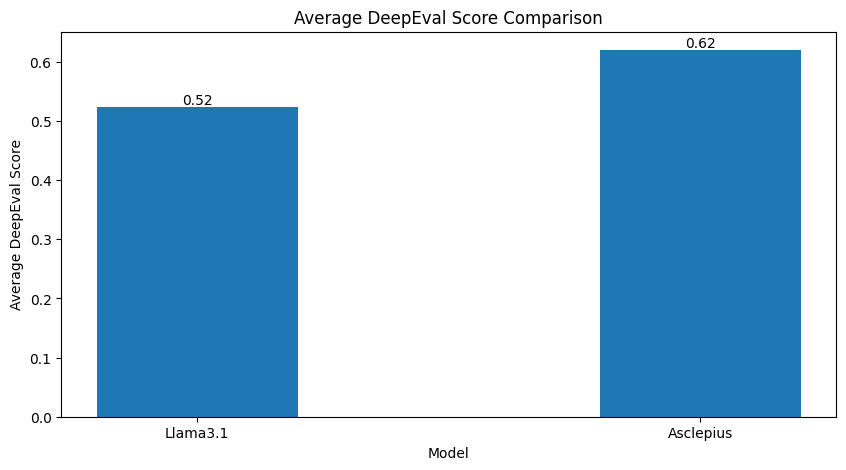

In [ ]:
# Plotting
deep_eval_scores = [
    deep_eval["DeepEval_llama3.1_score"].mean(),
    deep_eval["DeepEval_Asclepius_score"].mean()
]
plt.figure(figsize=(10, 5))
plt.bar(models,
        deep_eval_scores,
        width=0.4, label="DeepEval Score Comparison")
for i, score in enumerate(deep_eval_scores):
    plt.text(i, score + 0.005, f"{score:.2f}", ha="center", fontsize=10)
plt.xlabel("Model")
plt.ylabel("Average DeepEval Score")
plt.title("Average DeepEval Score Comparison")
plt.show()

In [ ]:

bert_asclepius = files.upload()
bert_asclepius = pd.read_csv('Asclepius_BERTScore_Benchmark_Results.csv')
bert_asclepius

Saving Asclepius_BERTScore_Benchmark_Results.csv to Asclepius_BERTScore_Benchmark_Results (1).csv


,AnswerID,Question,Reference_Answer,Model_Answer,Precision,Recall,F1_Score
0,ADAM_0003147_Sec1.txt,What is (are) Polycystic ovary syndrome ? (Als...,Polycystic ovary syndrome is a condition in wh...,Polycystic ovary syndrome is a condition chara...,0.851160,0.904592,0.877063
1,ADAM_0003147_Sec2.txt,What causes Polycystic ovary syndrome ? (Also ...,PCOS is linked to changes in hormone levels th...,The exact cause of Polycystic ovary syndrome i...,0.842050,0.823069,0.832451
2,ADAM_0002818_Sec7.txt,What are the complications of Noonan syndrome ?,Buildup of fluid in tissues of body (lymphedem...,Noonan syndrome is a genetic disorder that can...,0.813736,0.806946,0.810327
3,ADAM_0002818_Sec9.txt,How to prevent Noonan syndrome ?,Couples with a family history of Noonan syndro...,"Based on the given information, there is no kn...",0.819093,0.870525,0.844026
4,GARD_0004375_Sec1.txt,What are the symptoms of Neurofibromatosis-Noo...,The Human Phenotype Ontology provides the foll...,The symptoms of Neurofibromatosis-Noonan syndr...,0.830129,0.765296,0.796395
...,...,...,...,...,...,...,...
136,ADAM_0001283_Sec7.txt,Do I need to see a doctor for Drug abuse first...,Drug emergencies are not always easy to identi...,"Based on the given information, it is not spec...",0.835409,0.786247,0.810083
137,ADAM_0001284_Sec1.txt,What is (are) Drug allergies ? (Also called: A...,Drug allergies are a group of symptoms caused ...,Drug allergies refer to an allergic reaction c...,0.834061,0.919299,0.874608
138,ADAM_0001284_Sec8.txt,What is (are) Drug allergies ? (Also called: A...,Drug emergencies are not always easy to identi...,Drug allergies refer to an allergic reaction c...,0.823707,0.788044,0.805481
139,ADAM_0002089_Sec1.txt,What is (are) Hyperthermia for treating cancer ?,Hyperthermia uses heat to damage and kill canc...,Hyperthermia is a treatment for cancer that in...,0.860114,0.864130,0.862117


In [ ]:
bert_llama = files.upload()
bert_llama = pd.read_csv('Llama3.1q_BERTScore_Benchmark_Results.csv')
bert_llama

Saving Llama3.1q_BERTScore_Benchmark_Results.csv to Llama3.1q_BERTScore_Benchmark_Results (1).csv


,AnswerID,Question,Reference_Answer,Model_Answer,Precision,Recall,F1_Score
0,ADAM_0003147_Sec1.txt,What is (are) Polycystic ovary syndrome ? (Als...,Polycystic ovary syndrome is a condition in wh...,Polycystic ovary syndrome (PCOS) is a conditio...,0.906680,0.928292,0.917359
1,ADAM_0003147_Sec2.txt,What causes Polycystic ovary syndrome ? (Also ...,PCOS is linked to changes in hormone levels th...,Polycystic ovary syndrome (PCOS) is a common h...,0.873637,0.818074,0.844943
2,ADAM_0002818_Sec7.txt,What are the complications of Noonan syndrome ?,Buildup of fluid in tissues of body (lymphedem...,1. Webbed neck,0.860813,0.786904,0.822201
3,ADAM_0002818_Sec9.txt,How to prevent Noonan syndrome ?,Couples with a family history of Noonan syndro...,The Noonan syndrome is a rare genetic conditio...,0.826259,0.839306,0.832731
4,GARD_0004375_Sec1.txt,What are the symptoms of Neurofibromatosis-Noo...,The Human Phenotype Ontology provides the foll...,Neurofibromatosis-Noonan syndrome (NFNS) is a ...,0.837351,0.755621,0.794389
...,...,...,...,...,...,...,...
136,ADAM_0001283_Sec7.txt,Do I need to see a doctor for Drug abuse first...,Drug emergencies are not always easy to identi...,"No, you do not need to see a doctor for Drug a...",0.797267,0.767808,0.782260
137,ADAM_0001284_Sec1.txt,What is (are) Drug allergies ? (Also called: A...,Drug allergies are a group of symptoms caused ...,A drug allergy is an immune system reaction to...,0.850203,0.898760,0.873808
138,ADAM_0001284_Sec8.txt,What is (are) Drug allergies ? (Also called: A...,Drug emergencies are not always easy to identi...,Drug allergies are a type of allergic reaction...,0.836611,0.778679,0.806606
139,ADAM_0002089_Sec1.txt,What is (are) Hyperthermia for treating cancer ?,Hyperthermia uses heat to damage and kill canc...,Hyperthermia is a cancer treatment that uses h...,0.879015,0.861138,0.869985


In [ ]:
bert = pd.merge(bert_asclepius, bert_llama[['AnswerID','F1_Score']], on='AnswerID', suffixes=('_asclepius', '_llama'))

In [ ]:
bert

,AnswerID,Question,Reference_Answer,Model_Answer,Precision,Recall,F1_Score_asclepius,F1_Score_llama
0,ADAM_0003147_Sec1.txt,What is (are) Polycystic ovary syndrome ? (Als...,Polycystic ovary syndrome is a condition in wh...,Polycystic ovary syndrome is a condition chara...,0.851160,0.904592,0.877063,0.917359
1,ADAM_0003147_Sec2.txt,What causes Polycystic ovary syndrome ? (Also ...,PCOS is linked to changes in hormone levels th...,The exact cause of Polycystic ovary syndrome i...,0.842050,0.823069,0.832451,0.844943
2,ADAM_0002818_Sec7.txt,What are the complications of Noonan syndrome ?,Buildup of fluid in tissues of body (lymphedem...,Noonan syndrome is a genetic disorder that can...,0.813736,0.806946,0.810327,0.822201
3,ADAM_0002818_Sec9.txt,How to prevent Noonan syndrome ?,Couples with a family history of Noonan syndro...,"Based on the given information, there is no kn...",0.819093,0.870525,0.844026,0.832731
4,GARD_0004375_Sec1.txt,What are the symptoms of Neurofibromatosis-Noo...,The Human Phenotype Ontology provides the foll...,The symptoms of Neurofibromatosis-Noonan syndr...,0.830129,0.765296,0.796395,0.794389
...,...,...,...,...,...,...,...,...
136,ADAM_0001283_Sec7.txt,Do I need to see a doctor for Drug abuse first...,Drug emergencies are not always easy to identi...,"Based on the given information, it is not spec...",0.835409,0.786247,0.810083,0.782260
137,ADAM_0001284_Sec1.txt,What is (are) Drug allergies ? (Also called: A...,Drug allergies are a group of symptoms caused ...,Drug allergies refer to an allergic reaction c...,0.834061,0.919299,0.874608,0.873808
138,ADAM_0001284_Sec8.txt,What is (are) Drug allergies ? (Also called: A...,Drug emergencies are not always easy to identi...,Drug allergies refer to an allergic reaction c...,0.823707,0.788044,0.805481,0.806606
139,ADAM_0002089_Sec1.txt,What is (are) Hyperthermia for treating cancer ?,Hyperthermia uses heat to damage and kill canc...,Hyperthermia is a treatment for cancer that in...,0.860114,0.864130,0.862117,0.869985


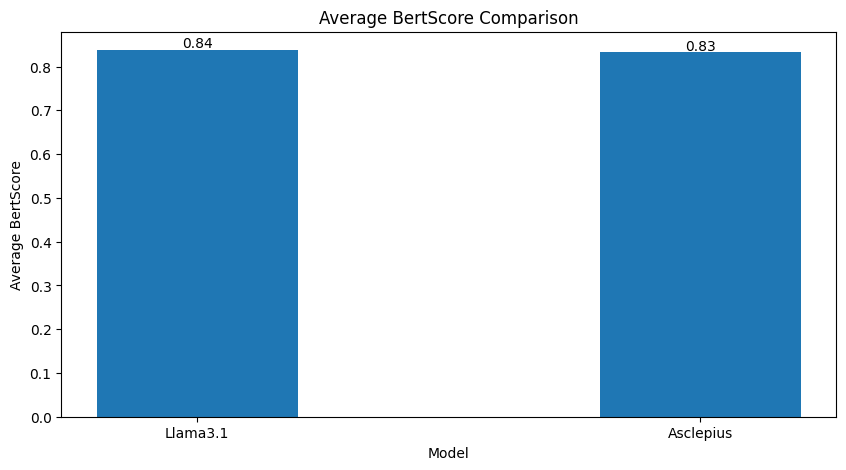

In [ ]:
# Plotting
# Bert Scores Comparison as Histogram
bert_scores = [
    bert["F1_Score_llama"].mean(),
    bert["F1_Score_asclepius"].mean()
]
plt.figure(figsize=(10, 5))
plt.bar(models,
        bert_scores,
        width=0.4, label="BertScore Comparison")
for i, score in enumerate(bert_scores):
    plt.text(i, score + 0.005, f"{score:.2f}", ha="center", fontsize=10)
plt.xlabel("Model")
plt.ylabel("Average BertScore")
plt.title("Average BertScore Comparison")
plt.show()

In [ ]:
print(manual_evaluation["llama3.1 Hallucination Score"].mean())
print(manual_evaluation["Asclepius Hallucination Score"].mean())
print(manual_evaluation["llama3.1 Factor Score"].mean())
print(manual_evaluation["Asclepius Factor Score"].mean())

0.6666666666666666
0.7801418439716312
0.3769081391421817
0.4314758527524485


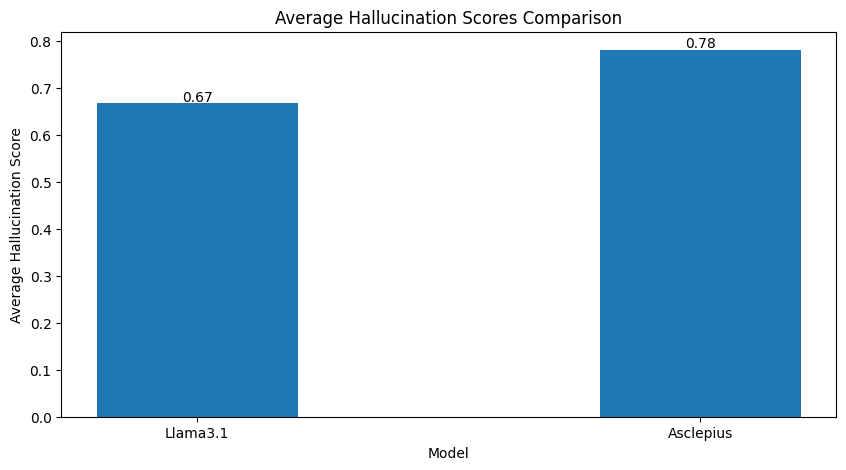

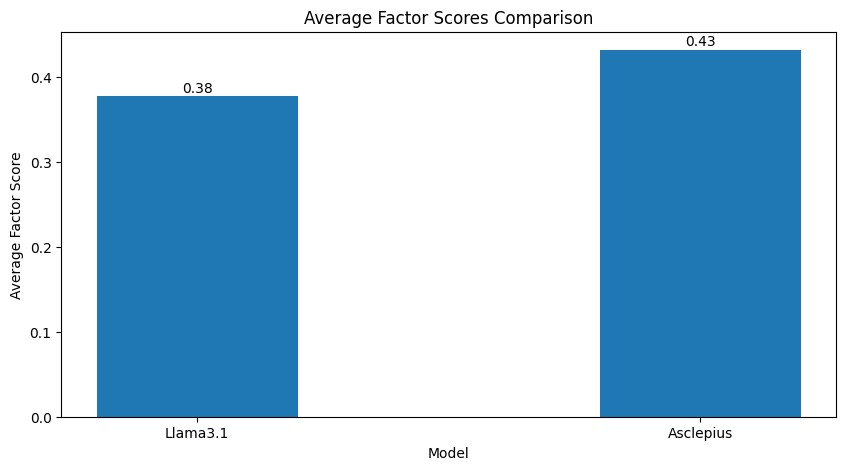

In [ ]:
# Plotting
# Hallucination Scores Comparison as Histogram
hallucination_scores = [manual_evaluation["llama3.1 Hallucination Score"].mean(),
                        manual_evaluation["Asclepius Hallucination Score"].mean()]
plt.figure(figsize=(10, 5))
plt.bar(models,
        hallucination_scores,
        width=0.4, label="Hallucination Score Comparison")
for i, score in enumerate(hallucination_scores):
    plt.text(i, score + 0.005, f"{score:.2f}", ha="center", fontsize=10)
plt.xlabel("Model")
plt.ylabel("Average Hallucination Score")
plt.title("Average Hallucination Scores Comparison")
plt.show()

# Factor Scores Comparison as Histogram
factor_scores = [manual_evaluation["llama3.1 Factor Score"].mean(),
                manual_evaluation["Asclepius Factor Score"].mean()]
plt.figure(figsize=(10, 5))
plt.bar(models,
        factor_scores,
        width=0.4, label="Factor Score Comparison")
for i, score in enumerate(factor_scores):
    plt.text(i, score + 0.005, f"{score:.2f}", ha="center", fontsize=10)
plt.xlabel("Model")
plt.ylabel("Average Factor Score")
plt.title("Average Factor Scores Comparison")
plt.show()

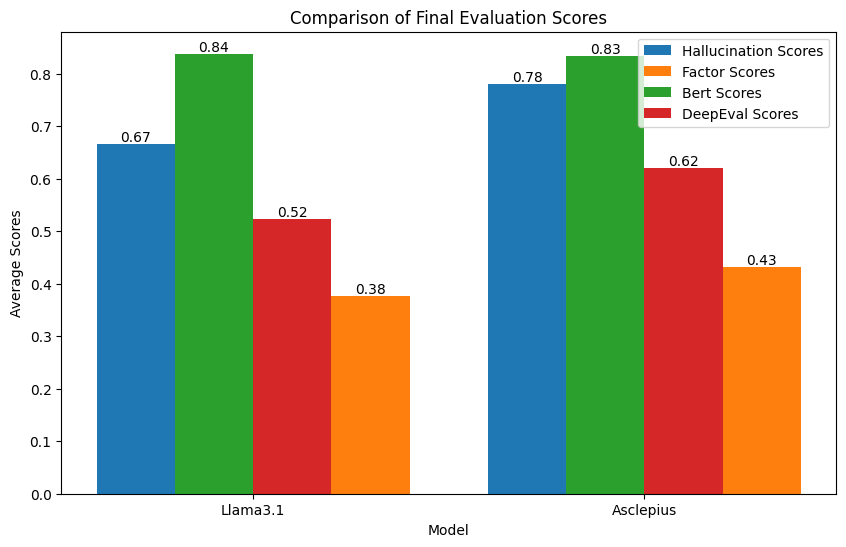

In [ ]:
# Combined Plot for Hallucination and Factor Scores
plt.figure(figsize=(10, 6))
x = range(len(models))

# Plot both scores
plt.bar([i - 1.5 * 0.2 for i in x], hallucination_scores, width=0.2, label="Hallucination Scores")
plt.bar([i + 1.5 * 0.2 for i in x], factor_scores, width=0.2, label="Factor Scores")
plt.bar([i - 0.5 * 0.2 for i in x], bert_scores, width=0.2, label="Bert Scores")
plt.bar([i + 0.5 * 0.2 for i in x], deep_eval_scores, width=0.2, label="DeepEval Scores")

# Annotate averages
for i, score in enumerate(hallucination_scores):
    plt.text(i - 1.5 * 0.2, score + 0.005, f"{score:.2f}", ha="center", fontsize=10)
for i, score in enumerate(factor_scores):
    plt.text(i + 1.5 * 0.2, score + 0.005, f"{score:.2f}", ha="center", fontsize=10)
for i, score in enumerate(bert_scores):
    plt.text(i - 0.5 * 0.2, score + 0.005, f"{score:.2f}", ha="center", fontsize=10)
for i, score in enumerate(deep_eval_scores):
    plt.text(i + 0.5 * 0.2, score + 0.005, f"{score:.2f}", ha="center", fontsize=10)

plt.xlabel("Model")
plt.ylabel("Average Scores")
plt.title("Comparison of Final Evaluation Scores")
plt.xticks(x, models)
plt.legend()
plt.show()